In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Lets load Bostan House Pricing Dataset

In [66]:
import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]
boston_df = pd.DataFrame(data, columns=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 
                                        'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 
                                        'LSTAT'])

In [67]:
#from sklearn.datasets import load_boston

In [68]:
#boston_df=load_boston()

In [69]:
boston_df.keys()

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [70]:
#Lets check the description of the dataset
print(boston_df.CRIM)

0      0.00632
1      0.02731
2      0.02729
3      0.03237
4      0.06905
        ...   
501    0.06263
502    0.04527
503    0.06076
504    0.10959
505    0.04741
Name: CRIM, Length: 506, dtype: float64


In [71]:
print(boston_df.ZN)

0      18.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
501     0.0
502     0.0
503     0.0
504     0.0
505     0.0
Name: ZN, Length: 506, dtype: float64


In [72]:
print(boston_df.INDUS)

0       2.31
1       7.07
2       7.07
3       2.18
4       2.18
       ...  
501    11.93
502    11.93
503    11.93
504    11.93
505    11.93
Name: INDUS, Length: 506, dtype: float64


# Preparing The Dataset

In [73]:
#dataset=pd.DataFrame(boston_df.data,columns=boston_df.CRIM)

In [74]:
boston_df.head()
#These are all my indipendent feature

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [75]:
#My output feature i.e depedent features is present in "Target set"

In [76]:
#boston_df['Price']=boston_df.target

In [77]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [78]:
boston_df.info()
#This gives me a basic count of data_set() and i check the missing value, which is very important

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [79]:
#To summerising the stats in the data
boston_df.describe()
#Only Neumerical info will be displayes, catogarical data will not be displayed

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [80]:
#check the missing values
boston_df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [81]:
#EDA exploratory data analysis
#Correlation
boston_df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993


In [82]:
# import seaborn as sns
# sns.pairplot(dataset)
# this will give me over all graph

Text(0, 0.5, 'INDUS')

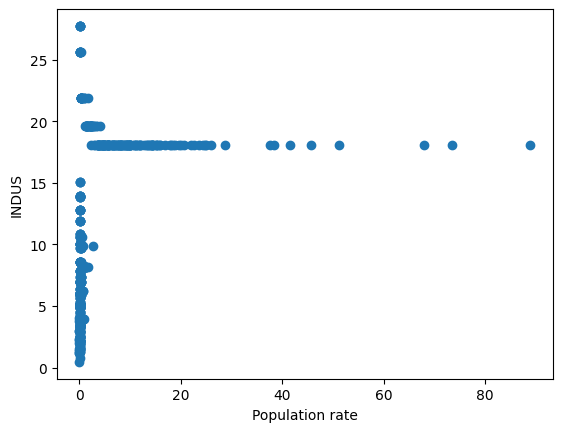

In [83]:
plt.scatter(boston_df['CRIM'], boston_df['INDUS'])
plt.xlabel("Population rate")
plt.ylabel("INDUS")

Text(0, 0.5, 'CHAS')

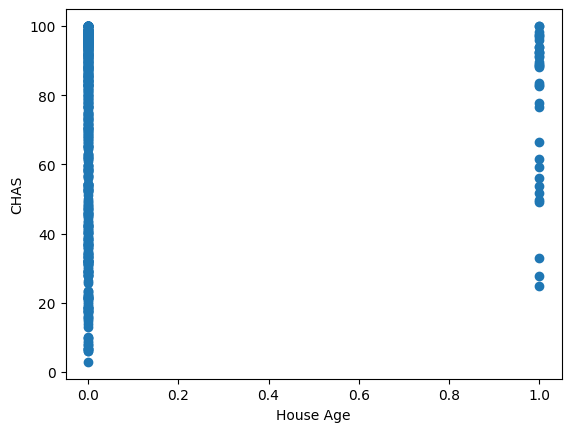

In [84]:
plt.scatter(boston_df['CHAS'], boston_df['AGE'])
plt.xlabel("House Age")
plt.ylabel("CHAS")

<Axes: xlabel='CRIM', ylabel='TAX'>

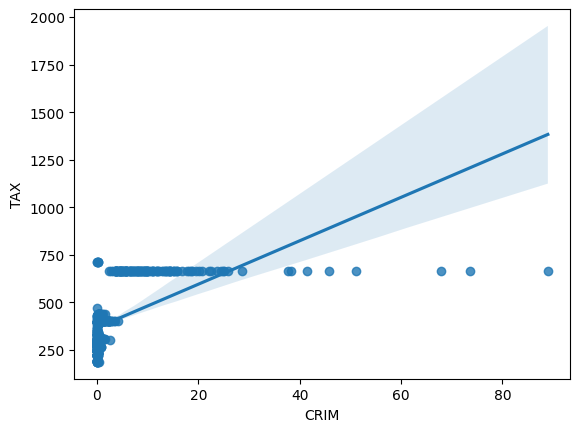

In [85]:
#To create a regression plot
import seaborn as sns
sns.regplot(x='CRIM',y='TAX',data=boston_df)

<Axes: xlabel='CHAS', ylabel='NOX'>

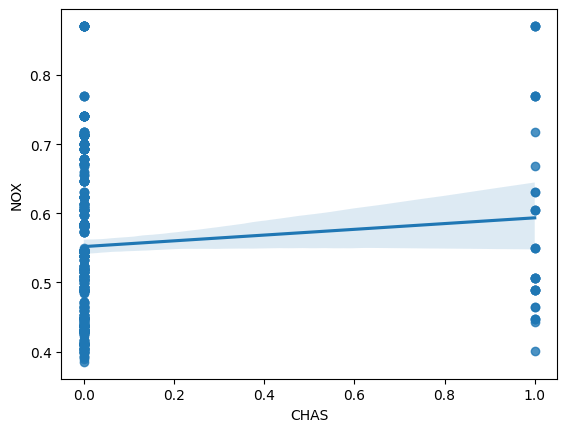

In [86]:
import seaborn as sns
sns.regplot(x='CHAS',y='NOX',data=boston_df)

<Axes: xlabel='CHAS', ylabel='LSTAT'>

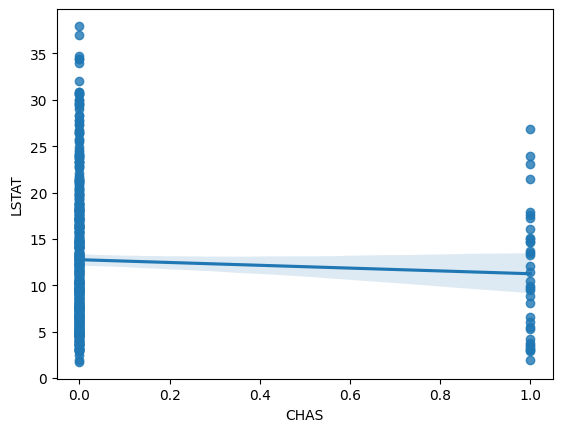

In [87]:
import seaborn as sns
sns.regplot(x='CHAS',y='LSTAT',data=boston_df)

<Axes: xlabel='PTRATIO', ylabel='DIS'>

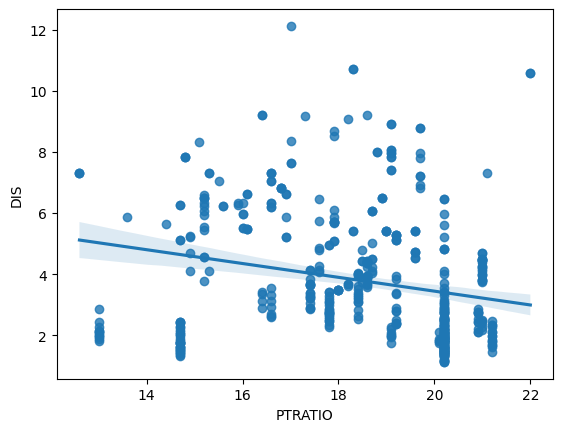

In [88]:
sns.regplot(x='PTRATIO',y='DIS',data=boston_df)

# NOW TO CREATE OUR MODEL

In [89]:
#Deviding data set to indipendent and dependent features

x=boston_df.iloc[:,:-1]
y=boston_df.iloc[:,]

In [90]:
x.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90


In [91]:
y.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [92]:
#TrainTest Split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [93]:
x_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12
116,0.13158,0.0,10.01,0.0,0.547,6.176,72.5,2.7301,6.0,432.0,17.8,393.30
45,0.17142,0.0,6.91,0.0,0.448,5.682,33.8,5.1004,3.0,233.0,17.9,396.90
16,1.05393,0.0,8.14,0.0,0.538,5.935,29.3,4.4986,4.0,307.0,21.0,386.85
468,15.57570,0.0,18.10,0.0,0.580,5.926,71.0,2.9084,24.0,666.0,20.2,368.74
...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.17120,0.0,8.56,0.0,0.520,5.836,91.9,2.2110,5.0,384.0,20.9,395.67
270,0.29916,20.0,6.96,0.0,0.464,5.856,42.1,4.4290,3.0,223.0,18.6,388.65
348,0.01501,80.0,2.01,0.0,0.435,6.635,29.7,8.3440,4.0,280.0,17.0,390.94
435,11.16040,0.0,18.10,0.0,0.740,6.629,94.6,2.1247,24.0,666.0,20.2,109.85


In [94]:
x_test

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B
173,0.09178,0.0,4.05,0.0,0.510,6.416,84.1,2.6463,5.0,296.0,16.6,395.50
274,0.05644,40.0,6.41,1.0,0.447,6.758,32.9,4.0776,4.0,254.0,17.6,396.90
491,0.10574,0.0,27.74,0.0,0.609,5.983,98.8,1.8681,4.0,711.0,20.1,390.11
72,0.09164,0.0,10.81,0.0,0.413,6.065,7.8,5.2873,4.0,305.0,19.2,390.91
452,5.09017,0.0,18.10,0.0,0.713,6.297,91.8,2.3682,24.0,666.0,20.2,385.09
...,...,...,...,...,...,...,...,...,...,...,...,...
441,9.72418,0.0,18.10,0.0,0.740,6.406,97.2,2.0651,24.0,666.0,20.2,385.96
23,0.98843,0.0,8.14,0.0,0.538,5.813,100.0,4.0952,4.0,307.0,21.0,394.54
225,0.52693,0.0,6.20,0.0,0.504,8.725,83.0,2.8944,8.0,307.0,17.4,382.00
433,5.58107,0.0,18.10,0.0,0.713,6.436,87.9,2.3158,24.0,666.0,20.2,100.19


In [95]:
#Standardizing the dataset
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [96]:
x_train=scaler.fit_transform(x_train)

In [97]:
x_test=scaler.transform(x_test)

In [98]:
import pickle
pickle.dump(scaler,open('scaling.pkl','wb'))

In [99]:
x_train

array([[-0.41425879, -0.50512499, -1.29214218, ..., -1.11279004,
         0.18727079,  0.39651419],
       [-0.40200818, -0.50512499, -0.16208345, ...,  0.15008778,
        -0.21208981,  0.3870674 ],
       [-0.39721053, -0.50512499, -0.60948856, ..., -1.0466393 ,
        -0.16771641,  0.42854113],
       ...,
       [-0.41604586,  3.03838247, -1.3166773 , ..., -0.76399522,
        -0.56707702,  0.35987906],
       [ 0.92611293, -0.50512499,  1.00549958, ...,  1.5572945 ,
         0.8528718 , -2.87841346],
       [-0.39030549, -0.50512499, -0.37135358, ..., -0.13857001,
         1.16348561, -3.32828832]])

In [100]:
x_test

array([[-0.406801  , -0.50512499, -1.02225586, ..., -0.66777595,
        -0.74457062,  0.41241246],
       [-0.41105674,  1.26662874, -0.68165068, ..., -0.92035152,
        -0.30083661,  0.42854113],
       [-0.4051199 , -0.50512499,  2.39678516, ...,  1.82791117,
         0.8084984 ,  0.35031705],
       ...,
       [-0.35439903, -0.50512499, -0.71195877, ..., -0.60162521,
        -0.38958342,  0.25688594],
       [ 0.25423453, -0.50512499,  1.00549958, ...,  1.5572945 ,
         0.8528718 , -2.98970133],
       [ 0.77732457, -0.50512499,  1.00549958, ...,  1.5572945 ,
         0.8528718 ,  0.33199949]])

# Model training

In [101]:
from sklearn.linear_model import LinearRegression

In [102]:
regression=LinearRegression()

In [103]:
regression.fit(x_train,y_train)

LinearRegression()

In [104]:
#Print the coefficients and the intercepets
print(regression.coef_)

[[ 8.30407703e+00 -3.46463819e-15 -8.95647264e-16  3.08994218e-16
  -1.78965329e-15  2.03224497e-15  1.18933602e-15 -1.73721692e-15
  -8.42659985e-16 -3.72059089e-15  1.31037760e-15 -3.96676478e-15]
 [ 1.30367986e-14  2.25765011e+01  0.00000000e+00  0.00000000e+00
  -8.88178420e-16 -6.66133815e-15 -4.44089210e-15  7.10542736e-15
  -8.88178420e-15 -5.32907052e-15  8.88178420e-16  7.99360578e-15]
 [-3.02447296e-15 -1.77635684e-15  6.92884344e+00  8.32667268e-17
   2.55351296e-15 -1.05471187e-15  0.00000000e+00  1.44328993e-15
   1.44328993e-15  6.66133815e-16 -2.77555756e-16 -5.55111512e-16]
 [ 1.41741372e-18 -1.09287579e-16  6.46184495e-17  2.60867715e-01
  -3.59955121e-17 -1.81061763e-16  9.80118764e-17  6.50521303e-17
  -5.11743425e-17 -1.71737624e-16  1.37693676e-16  1.38777878e-17]
 [-6.52282367e-17 -6.93889390e-18  2.42861287e-17  5.85469173e-18
   1.16626831e-01 -3.46944695e-18  1.04083409e-17 -3.98986399e-17
  -1.38777878e-17  5.89805982e-17 -4.33680869e-18  4.16333634e-17]
 [ 5.

In [105]:
print(regression.intercept_)

[3.46988686e+00 1.14039548e+01 1.11330508e+01 7.34463277e-02
 5.57259322e-01 6.32567232e+00 6.87997175e+01 3.76587401e+00
 9.43785311e+00 4.07042373e+02 1.82779661e+01 3.59701808e+02
 1.24211299e+01]


In [106]:
#On which parameters  the model has been trained
regression.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

# Prediction with Test Data

In [107]:
reg_pred=regression.predict(x_test)

In [108]:
reg_pred

array([[ 9.17800000e-02, -3.55271368e-15,  4.05000000e+00, ...,
         1.66000000e+01,  3.95500000e+02,  1.11134869e+01],
       [ 5.64400000e-02,  4.00000000e+01,  6.41000000e+00, ...,
         1.76000000e+01,  3.96900000e+02,  4.54020010e+00],
       [ 1.05740000e-01, -1.95399252e-14,  2.77400000e+01, ...,
         2.01000000e+01,  3.90110000e+02,  1.62049376e+01],
       ...,
       [ 5.26930000e-01, -3.19744231e-14,  6.20000000e+00, ...,
         1.74000000e+01,  3.82000000e+02,  1.43678871e+00],
       [ 5.58107000e+00, -6.03961325e-14,  1.81000000e+01, ...,
         2.02000000e+01,  1.00190000e+02,  1.80338603e+01],
       [ 9.92485000e+00, -2.84217094e-14,  1.81000000e+01, ...,
         2.02000000e+01,  3.88520000e+02,  1.80085643e+01]])

# Assumtion 

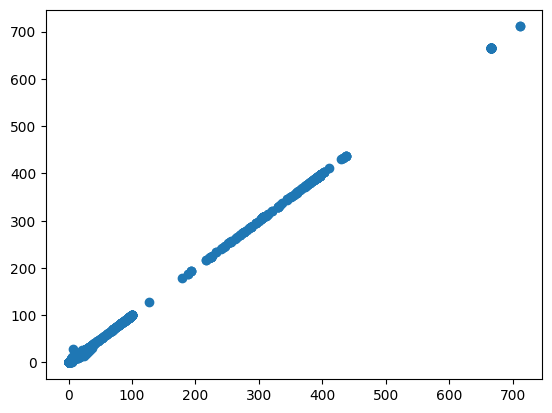

In [109]:
#Plot a scaterplot for prediction
plt.scatter(y_test,reg_pred)

In [110]:
#Residual
residuals=y_test-reg_pred

In [111]:
residuals

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
173,-3.524958e-15,3.552714e-15,4.440892e-15,-9.714451e-17,-1.110223e-16,-8.881784e-16,1.421085e-14,0.000000e+00,-1.776357e-15,0.000000e+00,0.000000e+00,0.000000e+00,-2.073487
274,2.393918e-15,-2.131628e-14,8.881784e-15,1.110223e-15,-1.110223e-16,8.881784e-16,-2.842171e-14,-1.776357e-15,1.243450e-14,5.684342e-14,0.000000e+00,-1.705303e-13,-1.010200
491,8.049117e-15,1.953993e-14,-3.552714e-15,-2.081668e-16,-3.330669e-16,-8.881784e-16,-1.421085e-14,-8.881784e-16,-8.881784e-15,-1.136868e-13,0.000000e+00,0.000000e+00,1.865062
72,1.387779e-15,-2.131628e-14,3.552714e-15,-2.359224e-16,-5.551115e-17,0.000000e+00,-1.865175e-14,-8.881784e-16,-5.329071e-15,0.000000e+00,3.552714e-15,-5.684342e-14,-1.624280
452,6.217249e-15,3.552714e-14,-7.105427e-15,4.163336e-17,-2.220446e-16,0.000000e+00,-1.421085e-14,1.776357e-15,0.000000e+00,-2.273737e-13,-3.552714e-15,-5.684342e-14,0.393646
...,...,...,...,...,...,...,...,...,...,...,...,...,...
441,3.552714e-15,3.019807e-14,-7.105427e-15,8.326673e-17,-2.220446e-16,8.881784e-16,-1.421085e-14,1.776357e-15,0.000000e+00,-2.273737e-13,-3.552714e-15,-5.684342e-14,2.163447
23,-3.663736e-15,-7.105427e-15,1.776357e-15,-6.245005e-16,-1.110223e-16,-8.881784e-16,1.421085e-14,0.000000e+00,-6.217249e-15,0.000000e+00,0.000000e+00,0.000000e+00,3.434580
225,-1.032507e-14,3.197442e-14,6.217249e-15,4.440892e-16,-1.110223e-16,1.776357e-15,0.000000e+00,-1.776357e-15,3.552714e-15,0.000000e+00,0.000000e+00,-1.136868e-13,3.193211
433,-8.881784e-15,6.039613e-14,-7.105427e-15,1.387779e-16,-1.110223e-16,1.776357e-15,-1.421085e-14,2.220446e-15,-7.105427e-15,-2.273737e-13,-3.552714e-15,-5.684342e-14,-1.813860


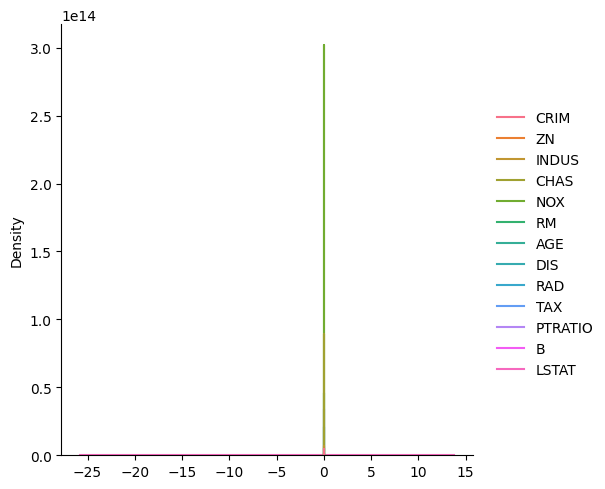

In [112]:
#Ploting this residuals

sns.displot(residuals,kind="kde")

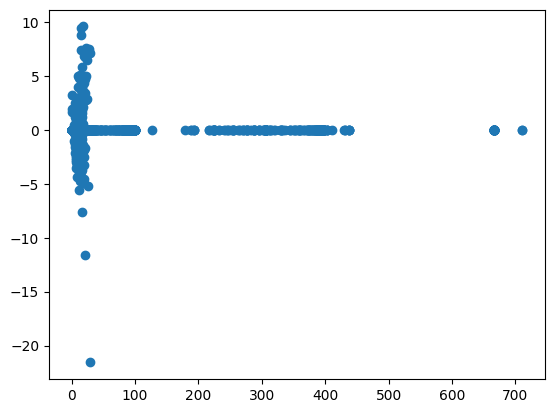

In [113]:
#Scater plot wrt to prediction and residuals
#It is suppose to be uniformly distributed
plt.scatter(reg_pred,residuals)

In [114]:
#Now to use performance metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print(mean_absolute_error(y_test,reg_pred))
print(mean_squared_error(y_test,reg_pred))
print(np.sqrt(mean_squared_error(y_test,reg_pred)))

0.21458957926384692
1.1323135206705095
1.0641022134506204


# R Square and adjusted R square

In [115]:
#Adjusted R Square will be always less than R Square 

In [116]:
from sklearn.metrics import r2_score
score=r2_score(y_test,reg_pred)
print(score)

0.9780245821887428


In [117]:
#display adjusted R-squared
1-(1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

0.9761274238165479

In [118]:
#time stamp 55min

# New Data Prediction

In [119]:
boston_df.values[0].reshape(1,-1)

array([[6.320e-03, 1.800e+01, 2.310e+00, 0.000e+00, 5.380e-01, 6.575e+00,
        6.520e+01, 4.090e+00, 1.000e+00, 2.960e+02, 1.530e+01, 3.969e+02,
        4.980e+00]])

In [120]:
#Transformation of a new data
# scaler.transform(boston_df.values[0].reshape(1, -1))
x = boston_df.drop('B', axis=1).values[0].reshape(1,-1)
scaler.transform(x)

c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[-0.41709233,  0.29216419, -1.27338003, -0.28154625, -0.16513629,
         0.34715902, -0.13030059,  0.15267164, -0.97798895, -0.66777595,
        -1.32142483, -4.0865665 ]])

In [121]:
# regression.predict(scaler.transform(boston_df.iloc[0].values.reshape(1, -1)))
x = boston_df.drop('B', axis=1).iloc[0].values.reshape(1,-1)
scaled_x = scaler.transform(x)
regression.predict(scaled_x)

c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[ 6.32000000e-03,  1.80000000e+01,  2.31000000e+00,
        -1.94289029e-16,  5.38000000e-01,  6.57500000e+00,
         6.52000000e+01,  4.09000000e+00,  1.00000000e+00,
         2.96000000e+02,  1.53000000e+01,  4.98000000e+00,
         1.21032372e+01]])

# Pickling the model for deployment

In [122]:
#time stamp 1 hour

In [123]:
import pickle

In [124]:
pickle.dump(regression,open('regmodel.pkl','wb'))

In [125]:
pickled_model=pickle.load(open('regmodel.pkl','rb'))

In [126]:
# Prediction 
# pickled_model.predict(scaler.transform(boston_df.data[0].reshape(1,-1)))
x = boston_df.drop('B', axis=1).values[0].reshape(1,-1)
scaled_x = scaler.transform(x)
pickled_model.predict(scaled_x)

c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[ 6.32000000e-03,  1.80000000e+01,  2.31000000e+00,
        -1.94289029e-16,  5.38000000e-01,  6.57500000e+00,
         6.52000000e+01,  4.09000000e+00,  1.00000000e+00,
         2.96000000e+02,  1.53000000e+01,  4.98000000e+00,
         1.21032372e+01]])

In [127]:
#time stamp: 1:04:27